# Задание

- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели:
  - Одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
  - SVM;
  - Дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


Выбранный датасет (алмазы):
Содержание:
- Цена в долларах США ($326--$18,823)
- Карат  (0.2--5.01)
- Качество обрезки (Низкое, Хорошее, Очень хорошее, Премиум, Идеальное)
- Цвет бриллианта, от J (худший) до D (лучший)
- Измерение прозрачности бриллианта (I1 (худшее), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучшее))
- X длина в мм (0--10.74)
- Y ширина в мм (0--58.9)
- Z глубина в мм (0--31.8)
- Общий процент глубины = z / среднее(x, y) = 2 * z / (x + y) (43--79)
- Ширина вершины бриллианта относительно самой широкой точки (43--95)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data = data.drop(columns=['id'])

In [4]:
data.shape, data.price.shape

((53940, 10), (53940,))

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропущенных значений нет

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Кодирование категориальных признаков

In [8]:
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
data['cut_encoded'] = data['cut'].map(cut_order)
data['color_encoded'] = data['color'].map(color_order)
data['clarity_encoded'] = data['clarity'].map(clarity_order)
df_encoded = data.drop(columns=['cut', 'color', 'clarity'])
print(df_encoded)

       carat  depth  table  price     x     y     z  cut_encoded  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43            4   
1       0.21   59.8   61.0    326  3.89  3.84  2.31            3   
2       0.23   56.9   65.0    327  4.05  4.07  2.31            1   
3       0.29   62.4   58.0    334  4.20  4.23  2.63            3   
4       0.31   63.3   58.0    335  4.34  4.35  2.75            1   
...      ...    ...    ...    ...   ...   ...   ...          ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50            4   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61            1   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56            2   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74            3   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64            4   

       color_encoded  clarity_encoded  
0                  5                1  
1                  5                2  
2                  5                4  
3                  1   

### Разделим выборку на обучающую и тестовую

In [9]:
from sklearn.model_selection import train_test_split

Выделим вектор переменных целевого признака, и матрицу признаков(без целевого)

In [10]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [11]:
print(X.head(), "\n")
print(y.head())

   carat  depth  table     x     y     z  cut_encoded  color_encoded  \
0   0.23   61.5   55.0  3.95  3.98  2.43            4              5   
1   0.21   59.8   61.0  3.89  3.84  2.31            3              5   
2   0.23   56.9   65.0  4.05  4.07  2.31            1              5   
3   0.29   62.4   58.0  4.20  4.23  2.63            3              1   
4   0.31   63.3   58.0  4.34  4.35  2.75            1              0   

   clarity_encoded  
0                1  
1                2  
2                4  
3                3  
4                1   

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=3)

In [13]:
X_train.shape, y_train.shape,

((53400, 9), (53400,))

In [14]:
X_test.shape, y_test.shape

((540, 9), (540,))

### Обучение моделей

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Train models
linear_regression = LinearRegression()
svm = SVR()
decision_tree = DecisionTreeClassifier()

linear_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Evaluate models
linear_regression_pred = linear_regression.predict(X_test)
print(linear_regression_pred)

[ 1.10571911e+03  1.06362972e+04  7.70371314e+03  2.74014758e+03
  3.21778577e+03  2.49007068e+03  1.03491072e+02  1.99941011e+03
  7.68787167e+03  1.50720101e+03  6.59091628e+03  1.40317808e+03
  9.03407270e+03  1.11757738e+03  1.55144318e+03  1.32685579e+04
  4.03740195e+02  8.80708573e+02  6.93689801e+02  9.50005923e+02
  8.29066477e+03  3.95760400e+02 -2.38549575e+02  4.50733697e+03
  2.77112913e+03  8.18587832e+02  1.87523088e+03  7.55273485e+03
  5.95380010e+02  1.00412434e+03  1.26041898e+03  1.69639316e+03
  5.17044641e+03  6.97931269e+03  5.82462177e+02  8.66030551e+03
  1.24605487e+04  1.18027852e+03 -1.32792986e+03  4.81367571e+03
  3.87559423e+03  7.10432612e+02  3.91704583e+02 -8.37047020e+02
  1.12705790e+04  9.59593397e+02  1.07479794e+03  2.38625010e+03
  2.80517951e+03  1.27875781e+03  1.79378888e+03 -1.69743276e+02
  1.10903037e+04  1.40652442e+03  7.01688777e+03  1.47427211e+03
  8.47996945e+03  1.44432796e+02  6.21580906e+03  7.53747902e+03
  9.82525641e+03  6.43449

In [26]:
svm_pred = svm.predict(X_test)
print(svm_pred)

[2334.00503451 2506.79687126 2400.0736395  2298.42129549 2369.8992116
 2348.17992198 2324.96624223 2367.5437378  2399.04054308 2430.30915798
 2425.33081144 2348.74575094 2431.56119354 2314.66096735 2385.29288189
 2552.75043305 2357.97135571 2325.40418317 2299.30697415 2353.13551765
 2509.69206359 2351.90228045 2371.27605672 2484.49475828 2356.23385662
 2363.78399782 2387.63754782 2405.28751792 2332.98518051 2379.10292458
 2309.94776097 2366.168285   2448.92071958 2450.82159419 2337.3883164
 2530.36518831 2502.36937303 2312.36884865 2349.64742258 2435.81986209
 2479.20045239 2324.87267393 2323.37952041 2341.57599537 2493.65441319
 2492.52890442 2289.39864076 2267.03455665 2370.49891862 2306.09152347
 2317.68007473 2330.49577439 2505.64857729 2346.06247391 2428.81393783
 2337.60413275 2411.65303819 2316.24760131 2458.44277521 2472.84269364
 2540.98413922 2436.40117117 2415.18726887 2442.10238489 2303.30416082
 2414.57850736 2379.03165396 2413.85407127 2364.94451386 2442.32931869
 2428.41

In [27]:
decision_tree_pred = decision_tree.predict(X_test)
print(decision_tree_pred)

[  786 15426  8401  1212  2105  1701   605  1836  8745  1790  7110  1438
 10923   742  1891 13833   915   742   453   910 11851   957   969  3895
  1963   899  1577 11167   942  1108   591  1415  6126  4771  1061  7822
 12338   865   432  5260  3425   723   666   500 13508  1232   687   840
  1819   661  1079   491 10608   982  7238  1007 17100   561  5889  7799
  8020  7964  4460  8850   776 10696  1949  1077  1749  6288  3160   975
  6936  4791  4791  7167  4672  4412  1024 17036  1279  1717   803  6087
   709   942   969 14611  3407  3218   687   678  1637   758  4165  9118
   936   695   612  2321   577  9355   793  4116   798   737   605  5087
 18701   463   577 10244  1311   989  4294  1061  2010  1993 10733  2078
  1990  2329  1000  8020  8702  2018   525   746  2016  4760 16717  1024
  5324  2863  6872  4478   684  9116   668  1657 12530 10080  2413 10499
  1838   898   791   684  3270   644  3325  6670  7723 11491  3935   918
  2590  3842   734  1918  4824  2093  1974  1082   

In [30]:
print(y_test)

36681      951
21314     9467
19527     8162
41099     1193
446       2816
         ...  
11593     5042
30800      742
43448     1415
34401      863
26096    15339
Name: price, Length: 540, dtype: int64


In [32]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)
svr_mse = mean_squared_error(y_test, svm_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)

In [37]:

linear_regression_r2 = r2_score(y_test, linear_regression_pred)
svr_r2 = r2_score(y_test, svm_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

In [ ]:
print("Linear Regression MSE:", linear_regression_mse)
print("SVM Accuracy:", svr_mse)
print("Decision Tree Accuracy:", decision_tree_mse)

In [38]:
print("Linear Regression R²:", linear_regression_r2)
print("SVR R²:", svr_r2)
print("Decision Tree R²:", decision_tree_r2)

Linear Regression R²: 0.8937262420934011
SVR R²: -0.12909420686460105
Decision Tree R²: 0.9414581180686377


### График, показывающий важность признаков в дереве решений.

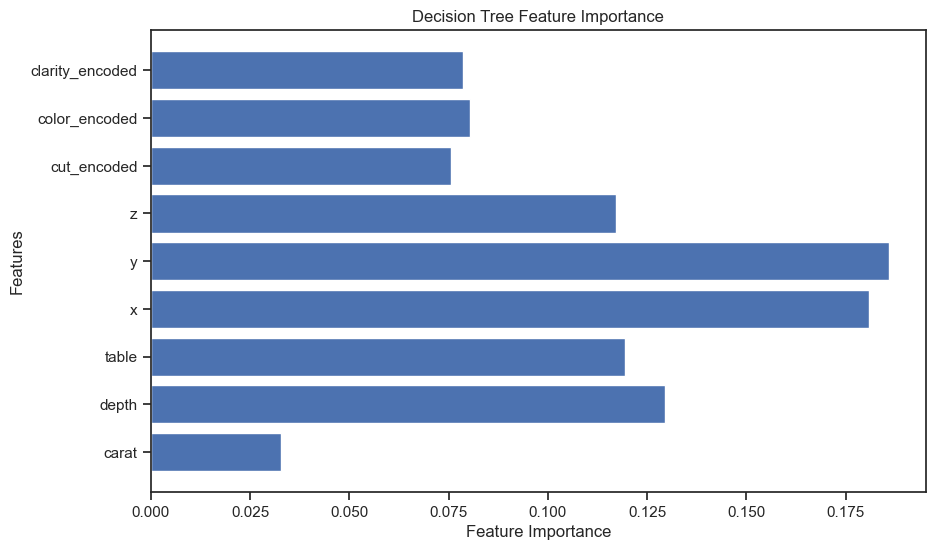

In [39]:
feature_importances = decision_tree.feature_importances_

# Get the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

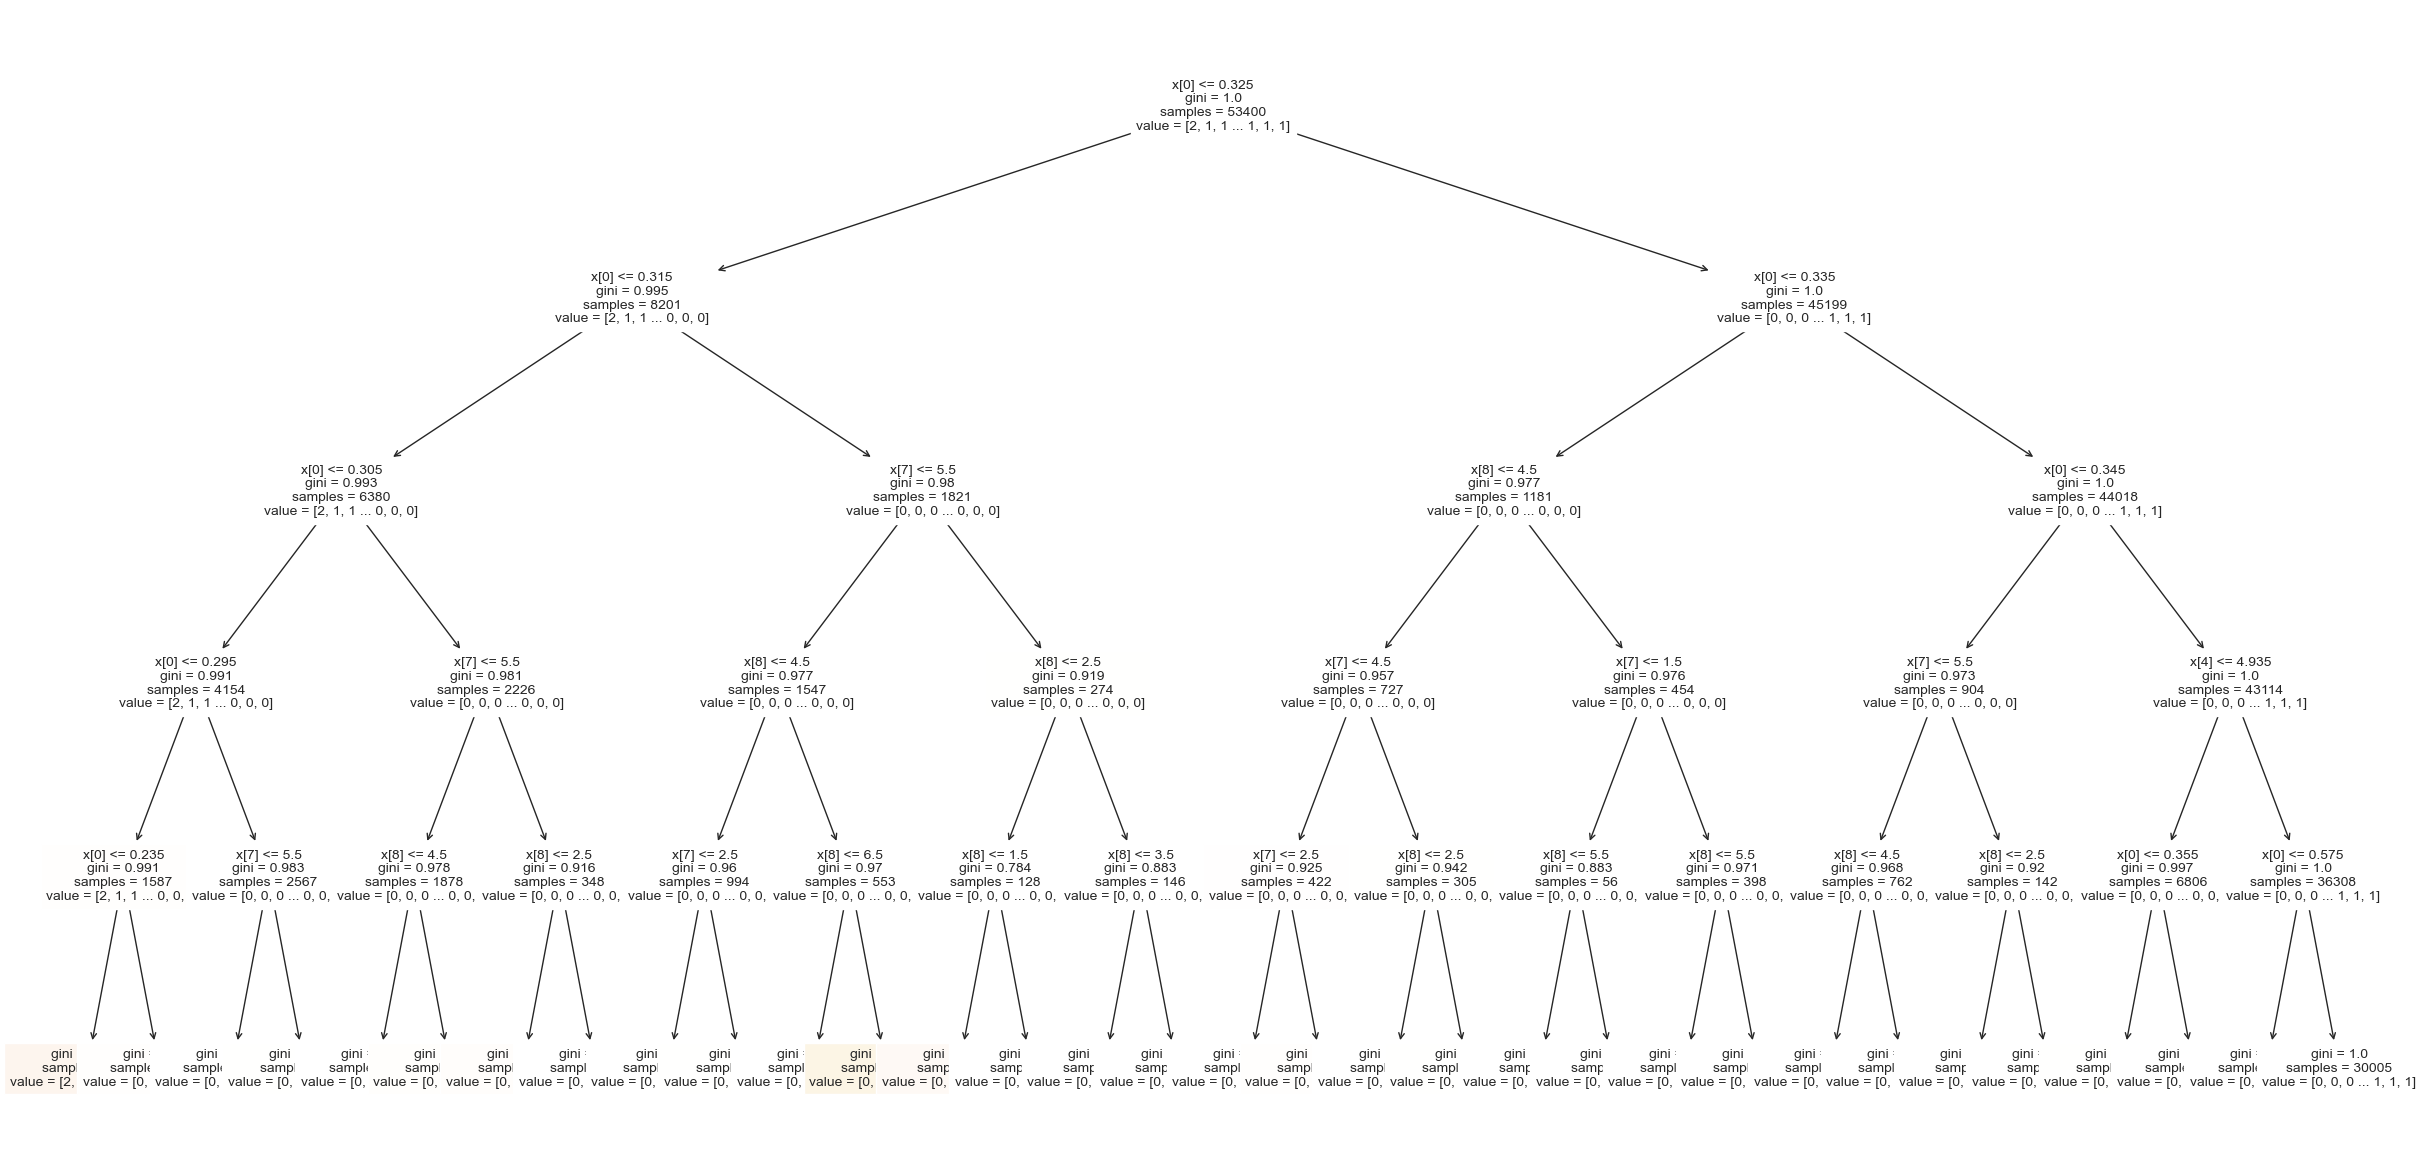

In [50]:
from sklearn.tree import plot_tree

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(30, 15))
plot_tree(clf, fontsize=10, filled=True)
plt.show()